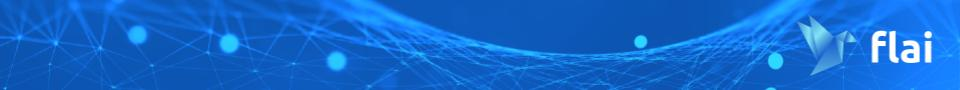

# **Aula 7 - Bagging e Random Forest**

---
## **Importação e Preparação dos Dados**

In [1]:
# importação via github 
import pandas as pd
url = 'https://raw.githubusercontent.com/gitflai/DDS4/main/insurance.csv'
dados = pd.read_csv(url)

# mise un place
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

# separação de variáveis preditoras e variával resposta
X = dados[['bmi', 'charges']]
y = dados['smoker'] 

---
## **Upgrade na Técnica de Validação: _K-FOLD REPETIDO ESTRATIFICADO_**

In [2]:
# Configuração da Validação Cruzada

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

## **Bagging de Modelos**

In [7]:
# Bagging
from sklearn.ensemble import BaggingClassifier 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

modelo_base = LogisticRegression()

modelo = BaggingClassifier(n_estimators = 50)
medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(), 4)

0.9509

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


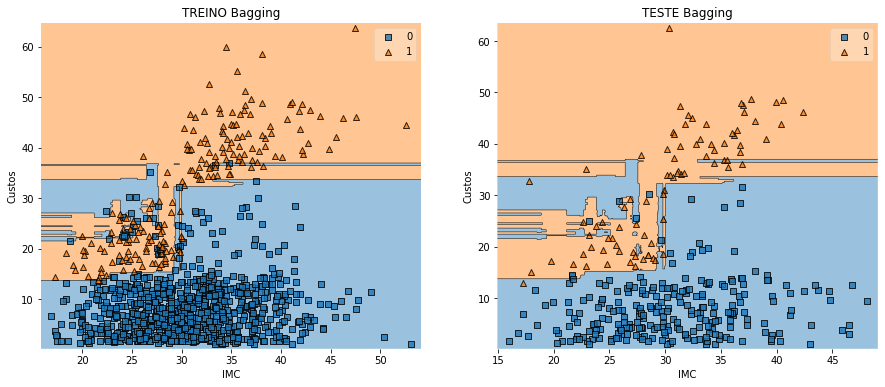

In [8]:
# Região de Decisão

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt 

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Bagging')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Bagging')   

plt.show()

---
## **Random Forest**

In [14]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(n_estimators = 200, 
                                max_features = 'auto',
                                bootstrap = True,
                                max_depth = 7, 
                                min_samples_split = 50)

medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(), 4)

0.9599

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


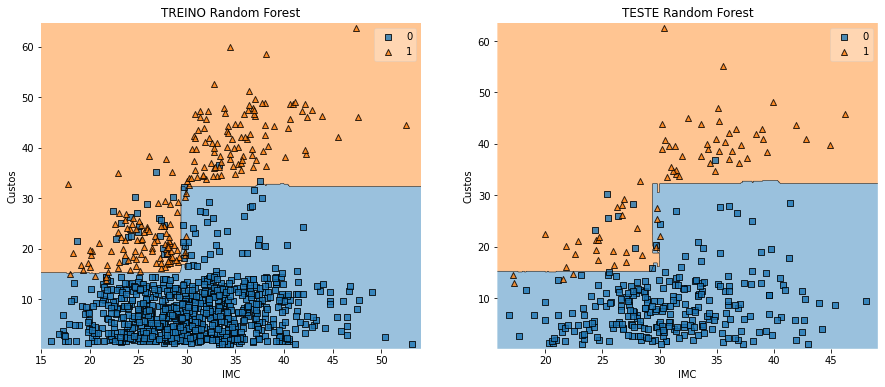

In [15]:
# Região de Decisão

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt 

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Random Forest')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Random Forest')   

plt.show()

---
## **Importância de Variáveis**

O Random Forest, assim como os demais modelos baseados em árvores de decisão, possui um output interessante, chamado **feature importance**. É um atributo que nos informa quais variáveis são mais importantes para o modelo. Dessa maneira, é possível conhecer melhor a interpretação que o modelo está fazendo dos dados e também permitir fazer uma seleção das variáveis mais importantes para utilizar em um modelo final. 

In [16]:
from sklearn.ensemble import RandomForestClassifier 

In [17]:
modelo_base = RandomForestClassifier(max_depth = 3) 
modelo_base.fit(X, y) 

RandomForestClassifier(max_depth=3)

In [18]:
modelo_base.feature_importances_

array([0.08012202, 0.91987798])

In [19]:
variaveis = pd.DataFrame()
variaveis['variavel'] = X.columns
variaveis['importância'] = modelo_base.feature_importances_
variaveis

,variavel,importância
0,bmi,0.080122
1,charges,0.919878


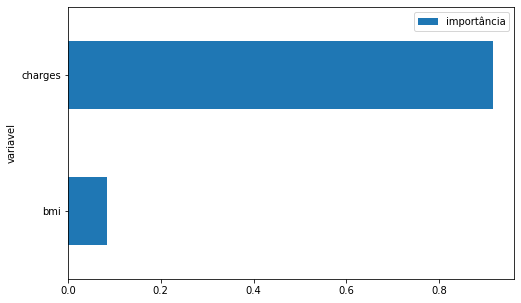

In [ ]:
variaveis.sort_values(by = 'importância', ascending = True, inplace = True)
variaveis.set_index('variavel', inplace = True)
variaveis.plot(kind='barh', figsize=(8, 5));

---
# **Exercício Proposto**

# Use o conhecimento adquirido até esse ponto para encontrar o melhor modelo de classificação para a variável **smoker**, em relação a métrica **acurácia**. Encontre também o melhor modelo de regressão para a variável **charges**, utilizando a métrica **EQM**.

---
**_#itstimetoflai_** 